# Identification
Please indicate your name and parcours (e.g.: IMA, DIGIT, BIM, DAC, ..., Erasmus)

Student 1: Andrea Cosentino

Student 2: Andrei Aralov

# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('image.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/home/andrew/Documents/Sorbonne/M1_1/BIMA/TME1/image.png'

Array can be displayed as an image using Matplotlib module. Here a short example:

In [ ]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercise 1
In this exercise, we work with image `img/moon.png`. If possible give two solutions: one with loops (for, while, ...) and one without loops using Numpy arithmetic avoiding ad-hoc Numpy functions such as `np.where()`. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

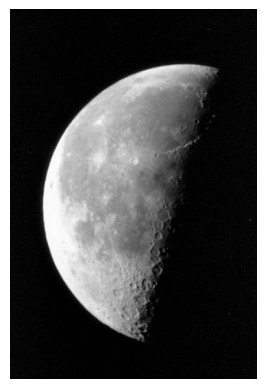

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))


def showImage(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

img = openImage('img/moon.png')
#print(img.min(),img.max(), img.dtype)
plt.axis('off')
showImage(img)

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [14]:
def countPixels(I,k):
    """ Array*int -> int"""
    r = 0
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i,j] == k:
                r += 1       
    return r

# We build an image on which to test the function
test = np.ones((10, 5))
test[3, 3] = 10
test[2, 3] = 10
# It contains all ones apart from two pixels that have value 10
count1 = countPixels(test, 1)
count10 = countPixels(test, 10)
print(f'There are {count1} pixels equal to 1 in \n{test}')
print(f'There are {count10} pixels equal to 10 in \n{test}')

There are 48 pixels equal to 1 in 
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1. 10.  1.]
 [ 1.  1.  1. 10.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
There are 2 pixels equal to 10 in 
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1. 10.  1.]
 [ 1.  1.  1. 10.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [15]:
def replacePixels(I, k1, k2):
    """ Array*int*int -> Array """
    ret = np.copy(I)
    ret[ret == k1] = k2
    return ret

#We test with k_1 = 3 and k_2 = 4. First we see how many k_1 and k_2 there are in I
I = openImage("img/moon.png")
print(f'#k_1 = {countPixels(I,3)}')
print(f'#k_2 = {countPixels(I,4)}')
print(f'The total amount (#k_1 + #k_2) is {countPixels(I,3) + countPixels(I,4)}')
# Then we apply the function and we expect the new Array to have #k_1+#k_2 pixels with value k_2 and exactly 0 pixels
# with value k_1
A = replacePixels(I,3,4)
print(f'The amount of pixels, in the new matrix, with value 3 is {countPixels(A,3)} and value 4 is {countPixels(A,4)}')
# We also expect that I should still have the same amount on the original image, therefore meaning it hasn't been
# corrupted by the operations
print(f'#k_1 = {countPixels(I,3)}')
print(f'#k_2 = {countPixels(I,4)}')


#k_1 = 25408
#k_2 = 17167
The total amount (#k_1 + #k_2) is 42575
The amount of pixels, in the new matrix, with value 3 is 0 and value 4 is 42575
#k_1 = 25408
#k_2 = 17167


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [16]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    mn, mx = np.min(I), np.max(I)
    ret = np.copy(I).astype(float)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            ret[i, j] = k1 + (k2 - k1) * (ret[i, j] - mn) / (mx - mn)
    return ret.astype(I.dtype)

print(f'If we normalize to [-1, 0.5], we get \n{normalizeImage(test, -1, 0.5)}')

If we normalize to [-1, 0.5], we get 
[[-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.   0.5 -1. ]
 [-1.  -1.  -1.   0.5 -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]]


And for the moon in [0:127]
0
127
[[0 1 3 ... 4 8 4]
 [1 3 1 ... 2 5 6]
 [3 2 3 ... 3 1 1]
 ...
 [2 4 4 ... 3 2 4]
 [2 4 4 ... 2 3 3]
 [1 1 1 ... 3 4 4]]
[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


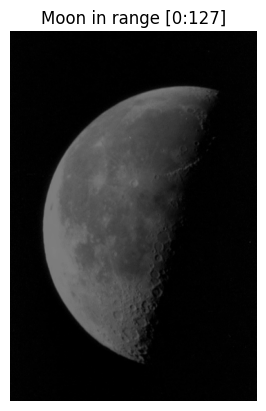

In [17]:
print('And for the moon in [0:127]')
# First we test that every element is within the new range
A = normalizeImage(openImage("img/moon.png"),0,127)
minK = np.amin(A)
maxK = np.amax(A)
print(minK)
print(maxK)
# We print A and I 
print(A)
print(I)
# As we can see, we are halving every pixel. For example 4 becomes 2.

plt.title("Moon in range [0:127]")
plt.axis('off')
showImage(A)

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

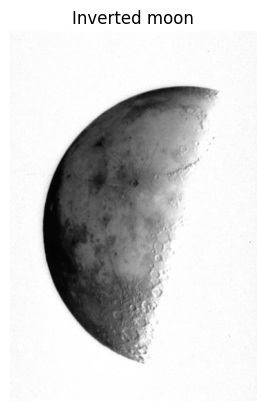

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]
[[254 252 248 ... 247 239 247]
 [252 248 252 ... 251 244 243]
 [249 251 249 ... 248 253 252]
 ...
 [251 247 247 ... 249 251 247]
 [251 247 247 ... 251 249 249]
 [253 252 252 ... 249 246 246]]


In [18]:
def inverteImage(I):
    """ Array -> Array """
    return 255 - I

plt.title('Inverted moon')
plt.axis('off')
A = inverteImage(img)
showImage(A)
print(img)
print(A)
# We can see that 1 is mapped in 254, 3 in 252, 7 in 248 etc.. etc.. 

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [19]:
def computeHistogram(I):
    """ Array -> Array """
    h = np.zeros(256, dtype=int)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            h[I[i, j]] += 1
    return h

hist = computeHistogram(img)
np_hist = np.histogram(img, bins=256, range=(0, 255))[0]
assert np.all(hist == np_hist)
print('Assertion checks that a histogram from numpy is the same as the manually computed')

# We don't think it is possible. We could mask it with numpy API, for instance using
# h = np.zeros(256, dtype=int)
# for k in range(0, 256):
#   h += np.count_nonzero(a == k)
#
# We don't actually know how numpy implements this operation, but it's likely that the implementation visits each pixel
# therefore we are brought to believe that there is no other way.

Assertion checks that a histogram from numpy is the same as the manually computed


7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

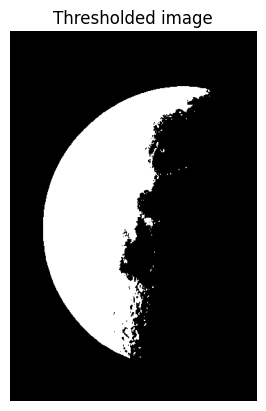

The number of pixels equal to 0 in the image after the threshold transformation is 137674
While the number of pixels less than the threshold value in the original image was 137674
The number of pixels equal to 255 in the image after the threshold transformation is 54572
The number of pixels equal to 255 in the image after the threshold transformation is 54572
The number of pixels equal to 255 in the image after the threshold transformation is 54572
The number of pixels equal to 255 in the image after the threshold transformation is 54572
The number of pixels equal to 255 in the image after the threshold transformation is 54572
The number of pixels equal to 255 in the image after the threshold transformation is 54572
The number of pixels equal to 255 in the image after the threshold transformation is 54572
The number of pixels equal to 255 in the image after the threshold transformation is 54572
The number of pixels equal to 255 in the image after the threshold transformation is 54572
T

In [20]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    ret = np.copy(I)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            ret[i, j] = 0 if ret[i, j] < s else 255
    return ret

moon_thresh = thresholdImage(img, 127)
plt.title('Thresholded image')
plt.axis('off')
showImage(moon_thresh)

# To test the function we compute first the histogram of the image. We check how many pixels are less than the
# threshold value, s (we try a random one, with the assumption that all cases are equal). 
# Then we calculate the thresholdImage and check that the number of zeros are equal to the 
# the value calculated before. We do the same thing for the pixels above or equal to s.
H = computeHistogram(img)
# We choose a threshold value, for example s = 81
s = 81
# n is the number of pixels with value less of 81
n = 0
for i in range(s):
    n = n+H[i]
A = thresholdImage(img,s)
print(f'The number of pixels equal to 0 in the image after the threshold transformation is {countPixels(A,0)}')
print(f'While the number of pixels less than the threshold value in the original image was {n}')
# Now we do the same thing for the other side
n = 0
for i in range(s,256):
    n = n + H[i]
print(f'The number of pixels equal to 255 in the image after the threshold transformation is {countPixels(A,255)}')
print(f'While the number of pixels greater or equal than the threshold value in the original image was {n}')

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

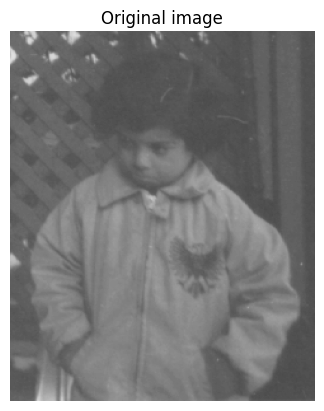

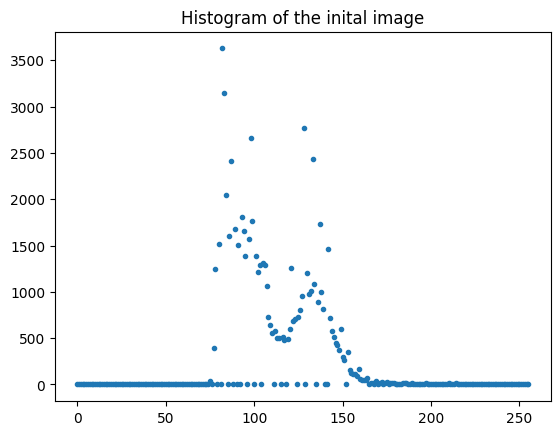

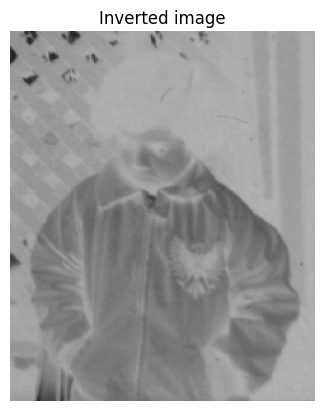

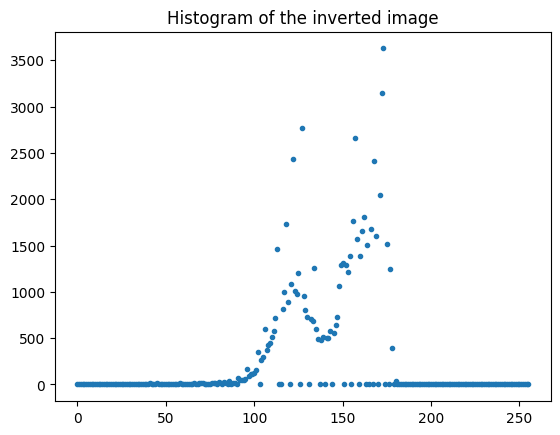

We can overlap the two histograms to see the difference


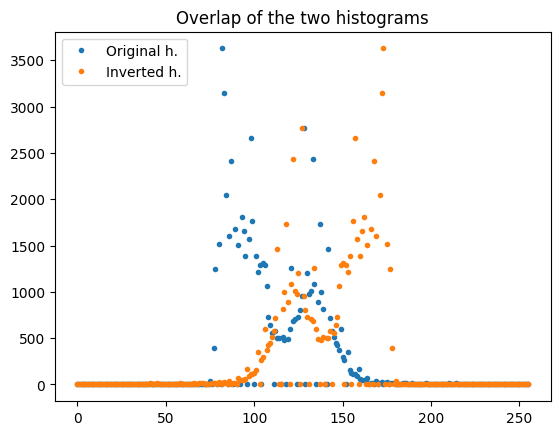

In [21]:
import matplotlib.pyplot as plt

img = openImage('img/pout.png')
plt.axis('off')
plt.title('Original image')
showImage(img)
hist = computeHistogram(img)
plt.plot(hist, '.')
plt.title("Histogram of the inital image")
plt.show()


img_inv = inverteImage(img)
plt.axis('off')
plt.title('Inverted image')
showImage(img_inv)
hist_inv = computeHistogram(img_inv)
plt.plot(hist_inv, '.')
plt.title("Histogram of the inverted image")
plt.show()

print("We can overlap the two histograms to see the difference")


plt.plot(hist, '.',label ='Original h.')
plt.plot(hist_inv, '.',label = 'Inverted h.')
plt.title("Overlap of the two histograms")
plt.legend(loc = 'upper left')
plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

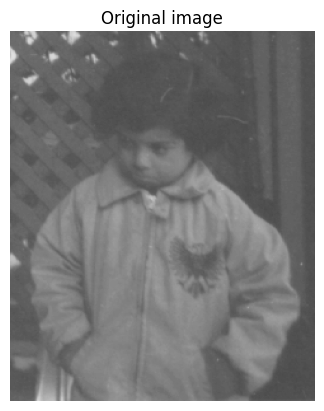

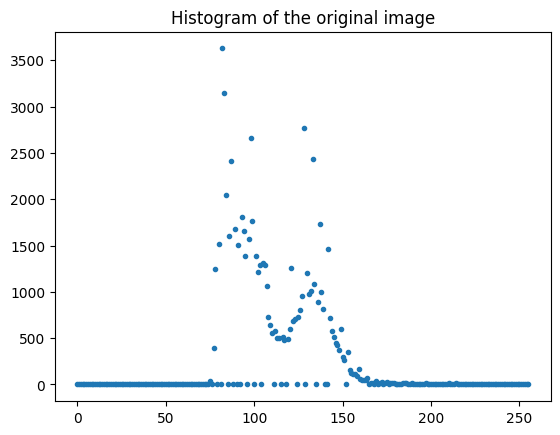

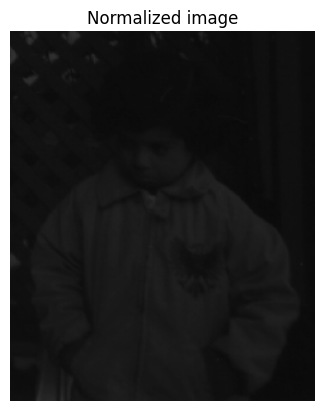

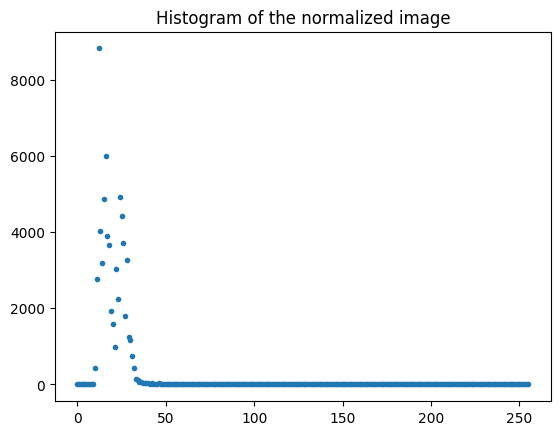

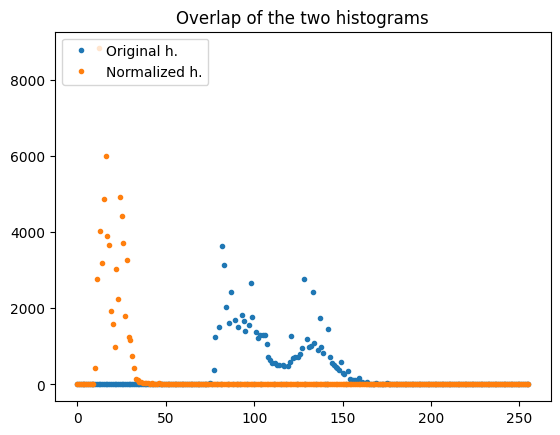

In [22]:
img = openImage('img/pout.png')
plt.axis('off')
plt.title('Original image')
showImage(img)
hist = computeHistogram(img)

img_norm = normalizeImage(img, 10, 50)

plt.plot(hist, '.')
plt.title("Histogram of the original image")
plt.show()
plt.title('Normalized image')
plt.axis('off')
showImage(img_norm)

hist_norm = computeHistogram(img_norm)
plt.plot(hist_norm, '.')
plt.title("Histogram of the normalized image")
plt.show()

plt.plot(hist,'.',label ='Original h.')
plt.plot(hist_norm, '.', label = "Normalized h.")
plt.title("Overlap of the two histograms")
plt.legend(loc = 'upper left')
plt.show()

# The image becomes worse because it has a more limited range of values.


10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

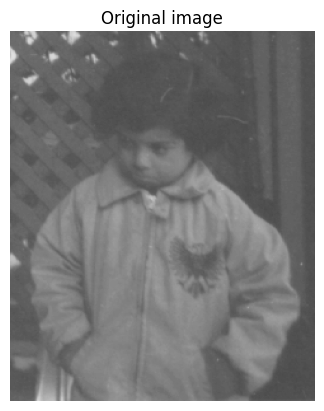

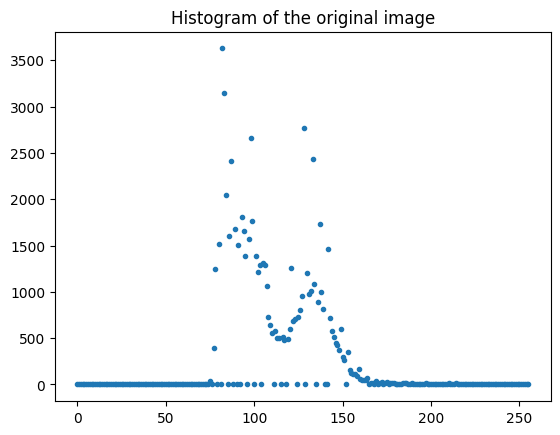

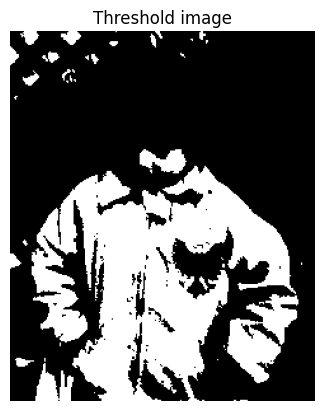

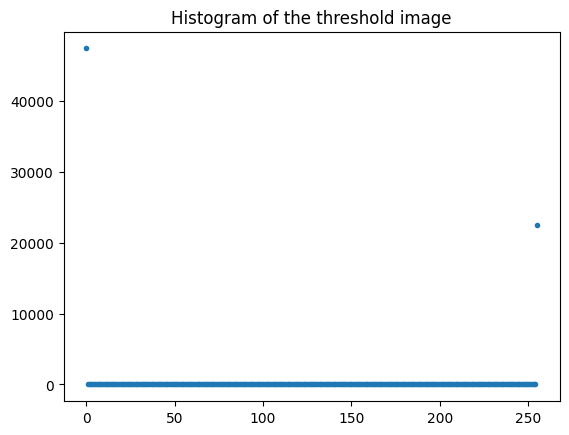

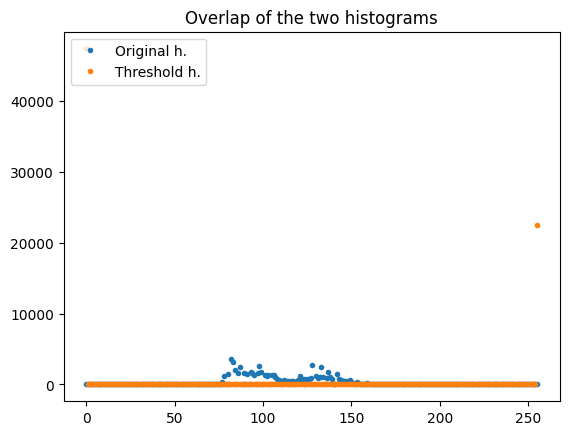

In [23]:
img = openImage('img/pout.png')
plt.axis('off')
plt.title('Original image')
showImage(img)
hist = computeHistogram(img)

img_th = thresholdImage(img, 127)
hist_th = computeHistogram(img_th)


plt.plot(hist, '.')
plt.title("Histogram of the original image")
plt.show()
plt.axis('off')
plt.title('Threshold image')
showImage(img_th)

plt.plot(hist_th, '.')
plt.title("Histogram of the threshold image")
plt.show()

plt.plot(hist,'.',label ='Original h.')
plt.plot(hist_th, '.', label = "Threshold h.")
plt.title("Overlap of the two histograms")
plt.legend(loc = 'upper left')
plt.show()

# As before, the image has a worse quality than the original.

## Exercise 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 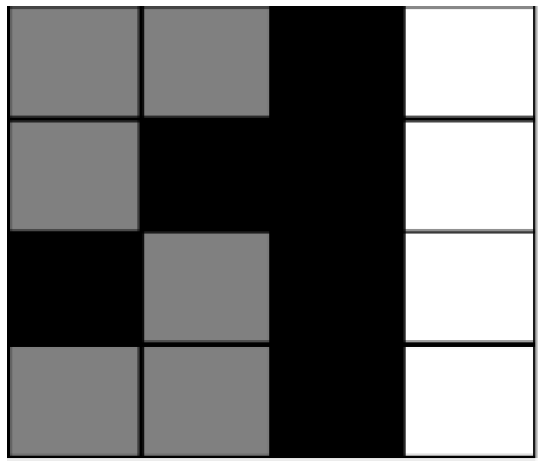 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

[[127 127   0 255]
 [127   0   0 255]
 [  0 127   0 255]
 [127 127   0 255]]


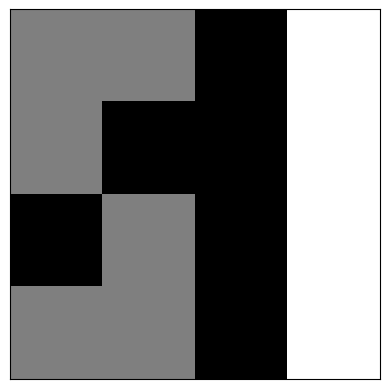

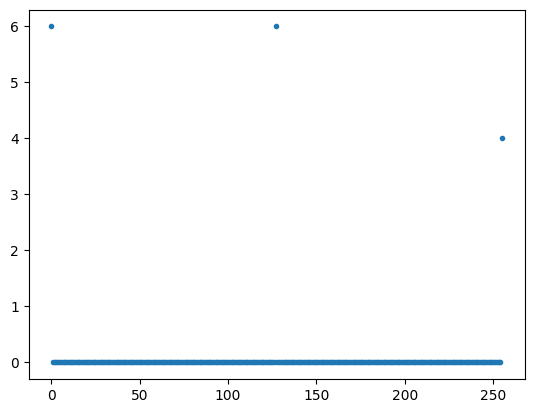

In [24]:
I = np.array([[127,127,0,255],
              [127,0,0,255],[0,127,0,255],
              [127,127,0,255]])

print(I)

plt.xticks([])
plt.yticks([])
showImage(I)

H = computeHistogram(I)
plt.plot(H,'.')
plt.show()

2. We want to generate an image having random values. Functions `rand()` and `randn()` from  `numpy.random` module generate an array of given shapes with random values following a uniform distribution on $[0,1[$ and a normal distribution respectively. Create an array of shape 512 by 512 having **integer** elements following a uniform distribution in the set $\{0,1,\cdots,255\}$. We also want to create an array following a Gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histograms. Discuss the results.

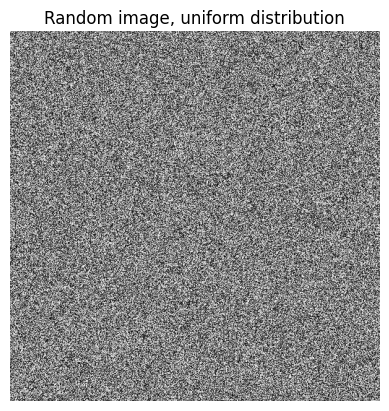

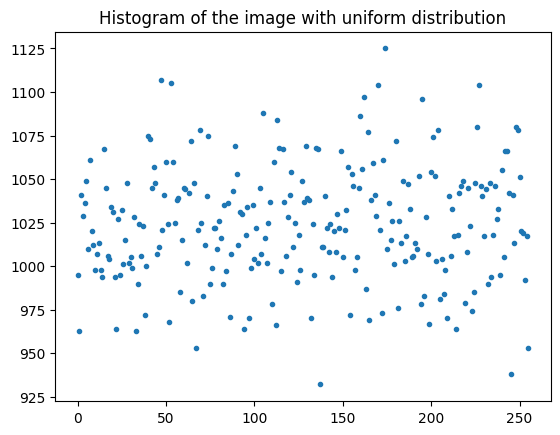

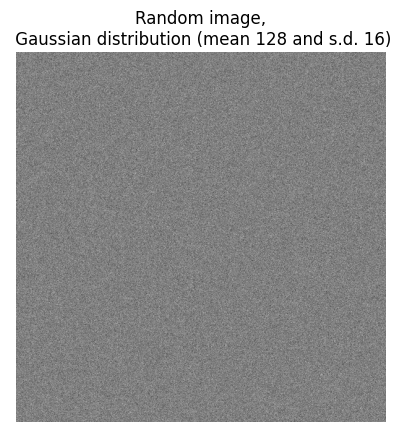

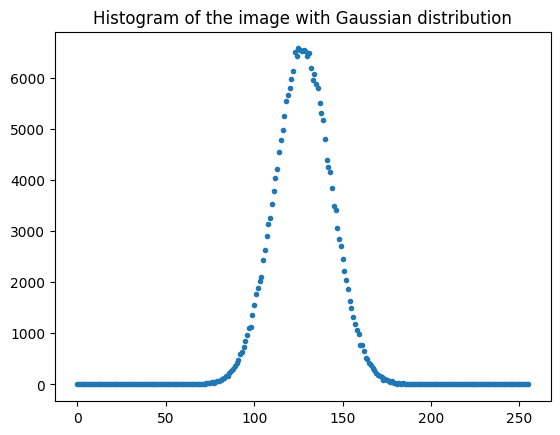

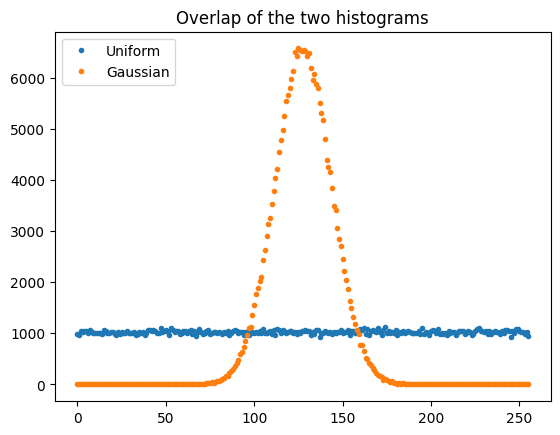

In [25]:
uniform = np.random.randint(256, size=(512, 512))
#print(uniform.min(), uniform.max())
plt.axis('off')
plt.title('Random image, uniform distribution')
showImage(uniform)
uniform_hist = computeHistogram(uniform)
plt.plot(uniform_hist, '.')
plt.title('Histogram of the image with uniform distribution')
plt.show()


normal = ( np.random.randn(512, 512) * 16 + 128 ).astype(np.uint8)
plt.title("Random image,\n Gaussian distribution (mean 128 and s.d. 16)")
plt.axis('off')
showImage(normal)

normal_hist = computeHistogram(normal)
plt.title('Histogram of the image with Gaussian distribution')
plt.plot(normal_hist, '.')

plt.show()


plt.title('Overlap of the two histograms')
plt.plot(uniform_hist,'.',label ='Uniform')
plt.plot(normal_hist, '.',label ='Gaussian')
plt.legend(loc = 'upper left')
plt.show()
# The first image seems to have a bigger local contrast and to be less "uniform" compared to the second one.

## Exercise 3: image manipulation
In this exercise, we work with image `img/pout.png`. 

1. Read and display this image

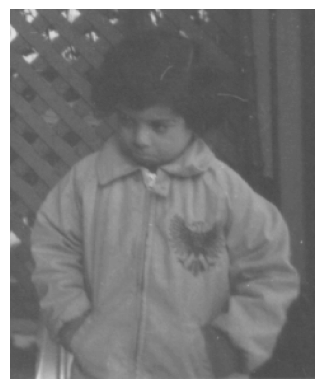

In [26]:
img = openImage('img/pout.png')
plt.axis('off')
showImage(img)

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

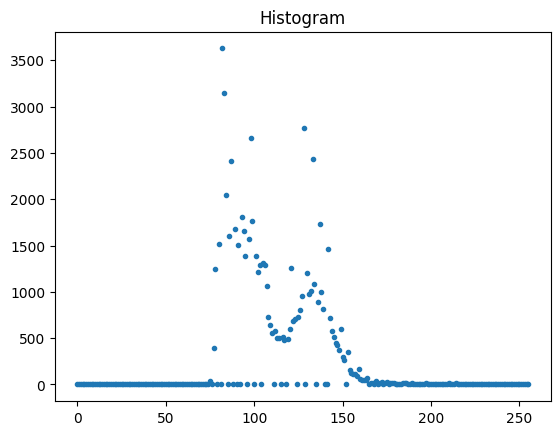

The extrema are 74, 224


In [27]:
hist = computeHistogram(img)
plt.plot(hist, '.')
plt.title('Histogram')
plt.show()

print(f'The extrema are {np.min(img)}, {np.max(img)}')
# The image has low contrast, as we don't use the full range of possible values,
# hence the quality isn't good.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

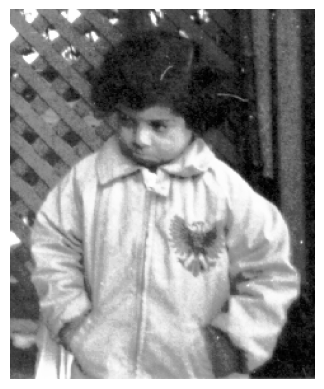

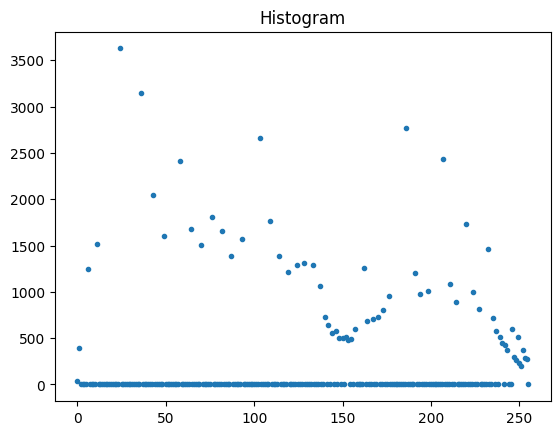

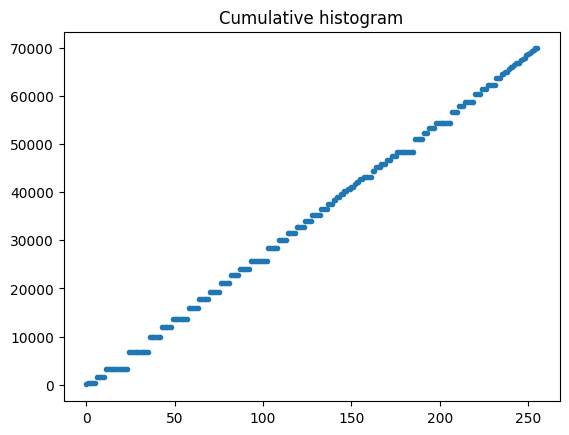

In [29]:
def computeCumulative(h):
    hc = np.zeros_like(h)
    hc[0] = h[0]
    for i in range(1, h.shape[0]):
        hc[i] = hc[i - 1] + h[i]
    return hc    

def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    mn, mx = 0, 255 
    ret = np.copy(I)
    hc = computeCumulative(h)
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            ret[i, j] = int((mx - mn) / (I.shape[0] * I.shape[1]) * hc[ret[i, j]])
    return ret

img_eq = histogramEqualization(img, computeHistogram(img))
plt.axis('off')
showImage(img_eq)

hist_eq = computeHistogram(img_eq)
plt.plot(hist_eq,'.')
plt.title("Histogram")
plt.show()

hist_eq_c = computeCumulative(hist_eq)
plt.plot(hist_eq_c, '.')
plt.title('Cumulative histogram')
plt.show()
# The image now uses a wider range of values and appears to be of better quality